In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.client import device_lib
print(tf.__version__)
print(device_lib.list_local_devices())
from tensorflow.keras import backend as K
K.clear_session()

2.10.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13874837010904776751
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2915513140
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1308115269834478926
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [3]:
# 고양이 개 사진 데이터 불러오기
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [4]:
# 검증 데이터와 훈련데이터 경로 저장
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

C:\Users\박해극\.keras\datasets\cats_and_dogs_filtered\train
C:\Users\박해극\.keras\datasets\cats_and_dogs_filtered\validation


In [5]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

C:\Users\박해극\.keras\datasets\cats_and_dogs_filtered\train\cats
C:\Users\박해극\.keras\datasets\cats_and_dogs_filtered\train\dogs
C:\Users\박해극\.keras\datasets\cats_and_dogs_filtered\validation\cats
C:\Users\박해극\.keras\datasets\cats_and_dogs_filtered\validation\dogs


In [6]:
# train 데이터와 검증데이터 수 확인
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
# parameter Initialization
batch_size = 8
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [8]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [10]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
print(train_data_gen[0][0])
print(train_data_gen[0][0].shape)

[[[[0.9960785  0.98823535 0.8352942 ]
   [0.9960785  0.98823535 0.8352942 ]
   [0.9960785  0.98823535 0.8352942 ]
   ...
   [0.9725491  0.9490197  0.7137255 ]
   [0.9725491  0.9490197  0.7137255 ]
   [0.9725491  0.9490197  0.7137255 ]]

  [[0.9960785  0.98823535 0.8352942 ]
   [0.9960785  0.98823535 0.8352942 ]
   [0.9960785  0.98823535 0.8352942 ]
   ...
   [0.9725491  0.9490197  0.7137255 ]
   [0.9725491  0.9490197  0.7137255 ]
   [0.9725491  0.9490197  0.7137255 ]]

  [[0.9960785  0.98823535 0.8352942 ]
   [0.9960785  0.98823535 0.8352942 ]
   [0.9960785  0.98823535 0.8352942 ]
   ...
   [0.9725491  0.94788176 0.71827704]
   [0.9725491  0.94787437 0.7183068 ]
   [0.9725491  0.9478669  0.7183365 ]]

  ...

  [[0.49803925 0.39607847 0.40000004]
   [0.49803925 0.39607847 0.40000004]
   [0.49803925 0.39607847 0.40000004]
   ...
   [0.6312619  0.4862192  0.56659746]
   [0.6348706  0.47380388 0.5588653 ]
   [0.5957719  0.4154935  0.5072127 ]]

  [[0.49803925 0.39607847 0.40000004]
   [0.4

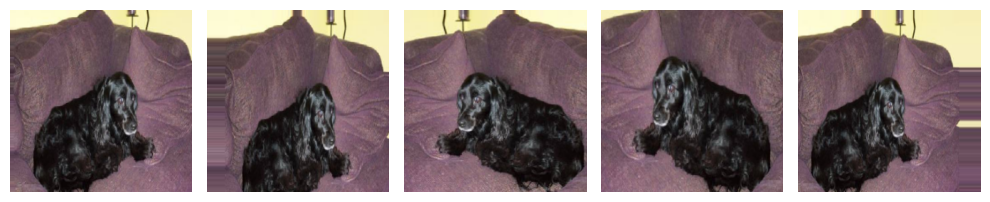

In [12]:
# Data Augmentation
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [14]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


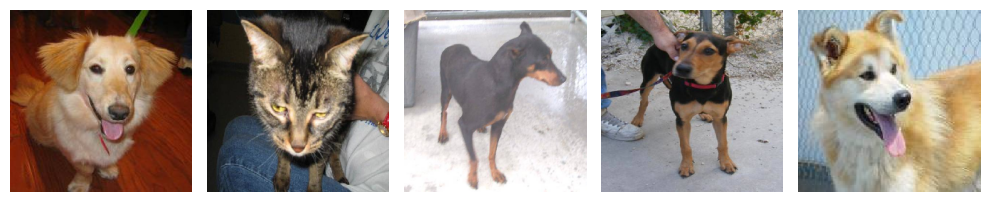

In [15]:
# 검증데이터 확인
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [16]:
_[:5] # 정답 데이터

array([1., 0., 1., 1., 1.], dtype=float32)

In [19]:
# 모델 구현
input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
# x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(128)(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation('relu')(x)
x=tf.keras.layers.Dense(128)(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation('relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_21 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization_12 (Bat  (None, 256, 256, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 128)     7385

In [20]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [21]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5
250/250 [==============================] - 111s 406ms/step - loss: 0.7367 - binary_accuracy: 0.5310 - val_loss: 0.7207 - val_binary_accuracy: 0.5110
Epoch 2/5
250/250 [==============================] - 100s 401ms/step - loss: 0.6970 - binary_accuracy: 0.5420 - val_loss: 0.6957 - val_binary_accuracy: 0.5450
Epoch 3/5
250/250 [==============================] - 100s 400ms/step - loss: 0.6866 - binary_accuracy: 0.5735 - val_loss: 0.6802 - val_binary_accuracy: 0.5810
Epoch 4/5
250/250 [==============================] - 100s 401ms/step - loss: 0.6906 - binary_accuracy: 0.5500 - val_loss: 0.8115 - val_binary_accuracy: 0.5670
Epoch 5/5
250/250 [==============================] - 101s 402ms/step - loss: 0.6887 - binary_accuracy: 0.5550 - val_loss: 0.7039 - val_binary_accuracy: 0.5660


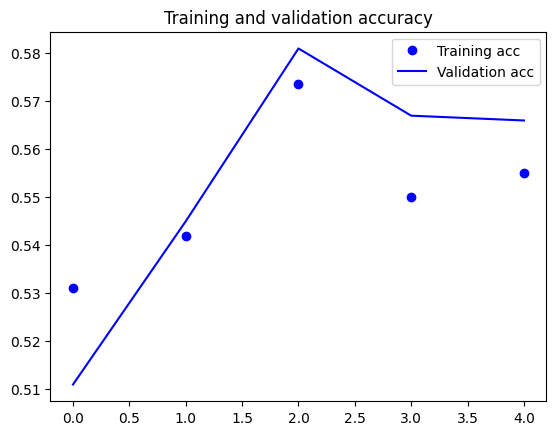

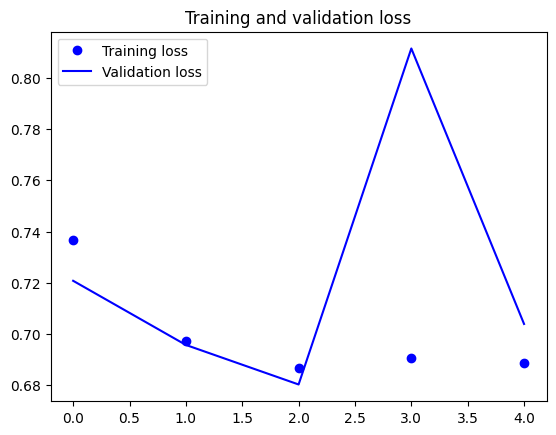

In [22]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 회고록
- 처음에 파라미터 수가 1.6억개로 돌려봤지만 ResourceValueError 가 떠서 파라미터수를 줄이기 위해 마지막 convolution 채널 수를 대폭줄이고 fully connected layer 뉴론수도 대폭 줄여서 겨우 돌렸다....
- 에폭을 늘리기엔 시간소요가 너무 많아 그냥 5로 맞추고 하이퍼파라미터를 조정 해봤지만 성능에는 크게 영향이 없었다.